<a href="https://www.kaggle.com/code/aqsamohsin123/customer-shopping-trend?scriptVersionId=148059761" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib as mpl


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv
/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv


In [2]:
trends=pd.read_csv("/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv")

df=pd.DataFrame(trends)

df.shape

(3900, 18)

In [3]:
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

## **As the data don't have any missing values we can skip data cleaing step**


# 1. What are the most popular items/categories being purchased in our store?

In [6]:

categories_count=df["Category"].value_counts()
categories_count

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

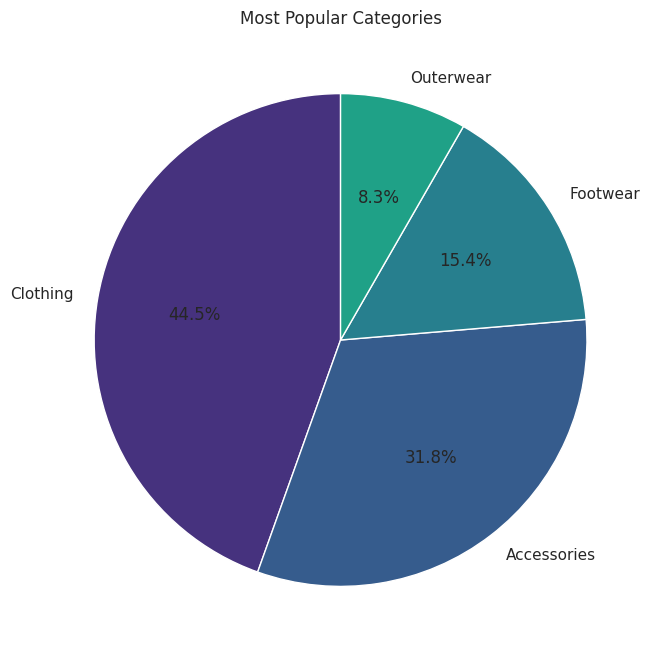

In [7]:
# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(categories_count, labels=categories_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis"))
plt.title('Most Popular Categories')
plt.show()

In [8]:
items_count=df["Item Purchased"].value_counts()
items_count

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

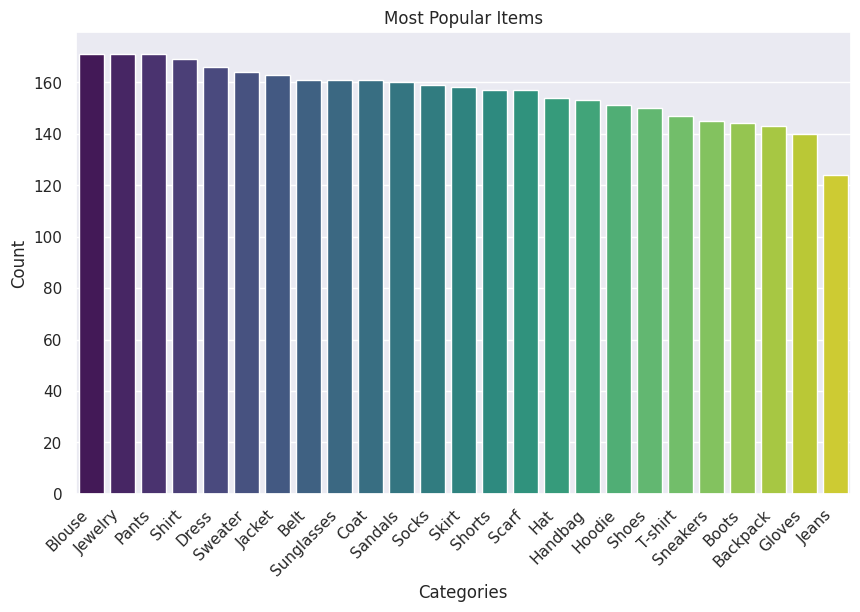

In [9]:
# Plotting a bar chart
plt.figure(figsize=(10, 6))
# items_count.plot(kind='bar')
sns.barplot(x=items_count.index, y=items_count.values, palette="viridis")
plt.title('Most Popular Items')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# 2. Can you identify any trends in customer age groups and their purchase preferences?

In [10]:
grouped_data = df.groupby(['Age', 'Item Purchased']).size().reset_index(name='Count')
grouped_data

,Age,Item Purchased,Count
0,18,Backpack,1
1,18,Belt,2
2,18,Blouse,2
3,18,Boots,3
4,18,Coat,5
...,...,...,...
1245,70,Skirt,2
1246,70,Sneakers,4
1247,70,Socks,7
1248,70,Sweater,4


In [11]:
# creating a new column fordefining ages groups
# Define the age bins and labels for the groups
bins = [18, 25, 35, 45, 60, 100]  
labels = ['18-25', '26-35', '36-45', '46-60', '60+']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age Group']


0       46-60
1       18-25
2       46-60
3       18-25
4       46-60
        ...  
3895    36-45
3896    46-60
3897    46-60
3898    36-45
3899    46-60
Name: Age Group, Length: 3900, dtype: category
Categories (5, object): ['18-25' < '26-35' < '36-45' < '46-60' < '60+']

In [12]:
grouped_data = df.groupby(['Age Group', 'Item Purchased']).size().reset_index(name='Count')
grouped_data

,Age Group,Item Purchased,Count
0,18-25,Backpack,12
1,18-25,Belt,24
2,18-25,Blouse,20
3,18-25,Boots,12
4,18-25,Coat,27
...,...,...,...
120,60+,Sneakers,23
121,60+,Socks,38
122,60+,Sunglasses,32
123,60+,Sweater,33


In [13]:
# Find the index of the maximum count for each age group
idx = grouped_data.groupby('Age Group')['Count'].idxmax()

# Get the most purchased item in each age group
most_purchased_items = grouped_data.loc[idx]

# Display the result
print(most_purchased_items)

    Age Group Item Purchased  Count
23      18-25        Sweater     29
25      26-35       Backpack     40
63      36-45          Pants     43
79      46-60           Coat     55
112       60+        Jewelry     48


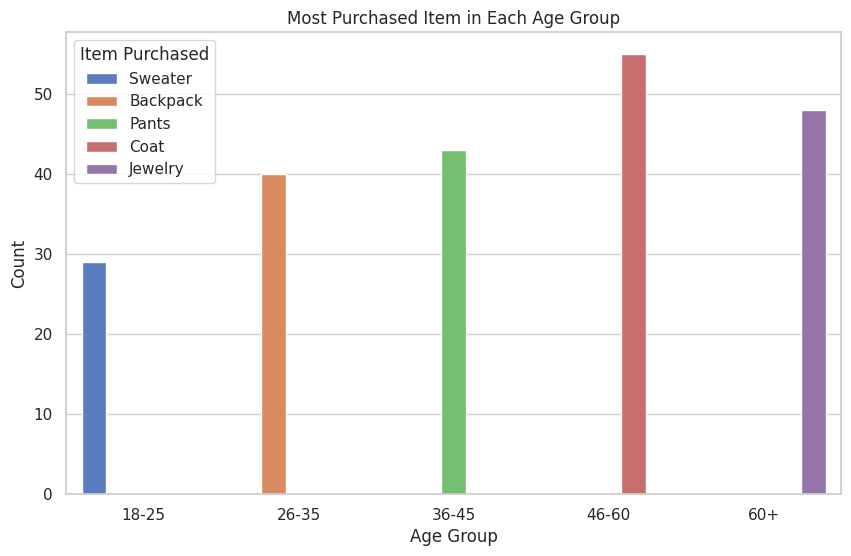

In [14]:
# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# Plotting a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Count', hue='Item Purchased', data=most_purchased_items)
plt.title('Most Purchased Item in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Item Purchased', title_fontsize='12')
plt.show()


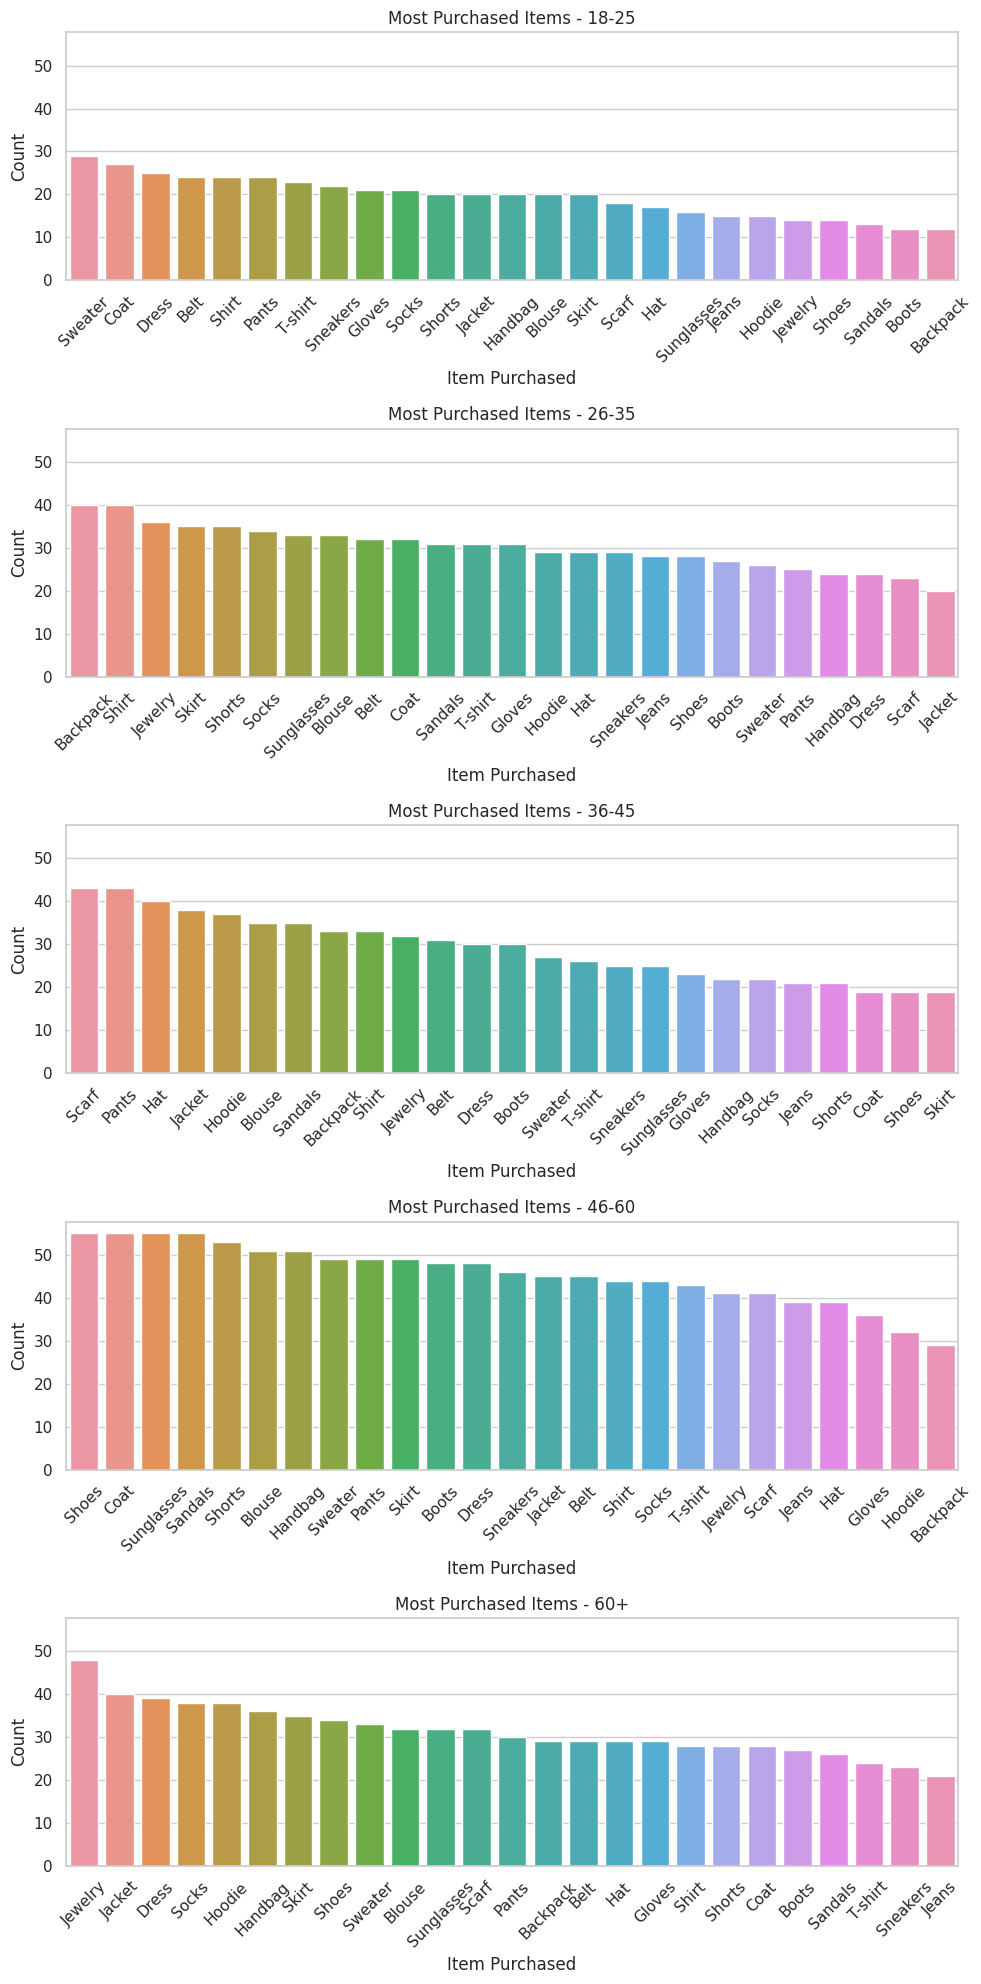

In [15]:
# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# Get unique age groups
age_groups = grouped_data['Age Group'].unique()

# Create subplots for each age group
fig, axes = plt.subplots(nrows=len(age_groups), figsize=(10, 4 * len(age_groups)), sharey=True)

# Plot different visuals for each age group
for i, age_group in enumerate(age_groups):
    data_subset = grouped_data[grouped_data['Age Group'] == age_group]
    data_subset = data_subset.sort_values(by='Count', ascending=False)  # Sort by count
    
    # Create a bar chart for each age group
    sns.barplot(ax=axes[i], x='Item Purchased', y='Count', data=data_subset)
    axes[i].set_title(f'Most Purchased Items - {age_group}')
    axes[i].set_xlabel('Item Purchased')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)   # Rotate x-axis labels

plt.tight_layout()
plt.show()

# 3. Are there any gender-specific purchasing patterns we can leverage for marketing?

In [16]:
grouped_data = df.groupby(['Gender', 'Item Purchased']).size().reset_index(name='Count')
grouped_data

,Gender,Item Purchased,Count
0,Female,Backpack,37
1,Female,Belt,55
2,Female,Blouse,66
3,Female,Boots,50
4,Female,Coat,47
5,Female,Dress,52
6,Female,Gloves,37
7,Female,Handbag,58
8,Female,Hat,52
9,Female,Hoodie,51


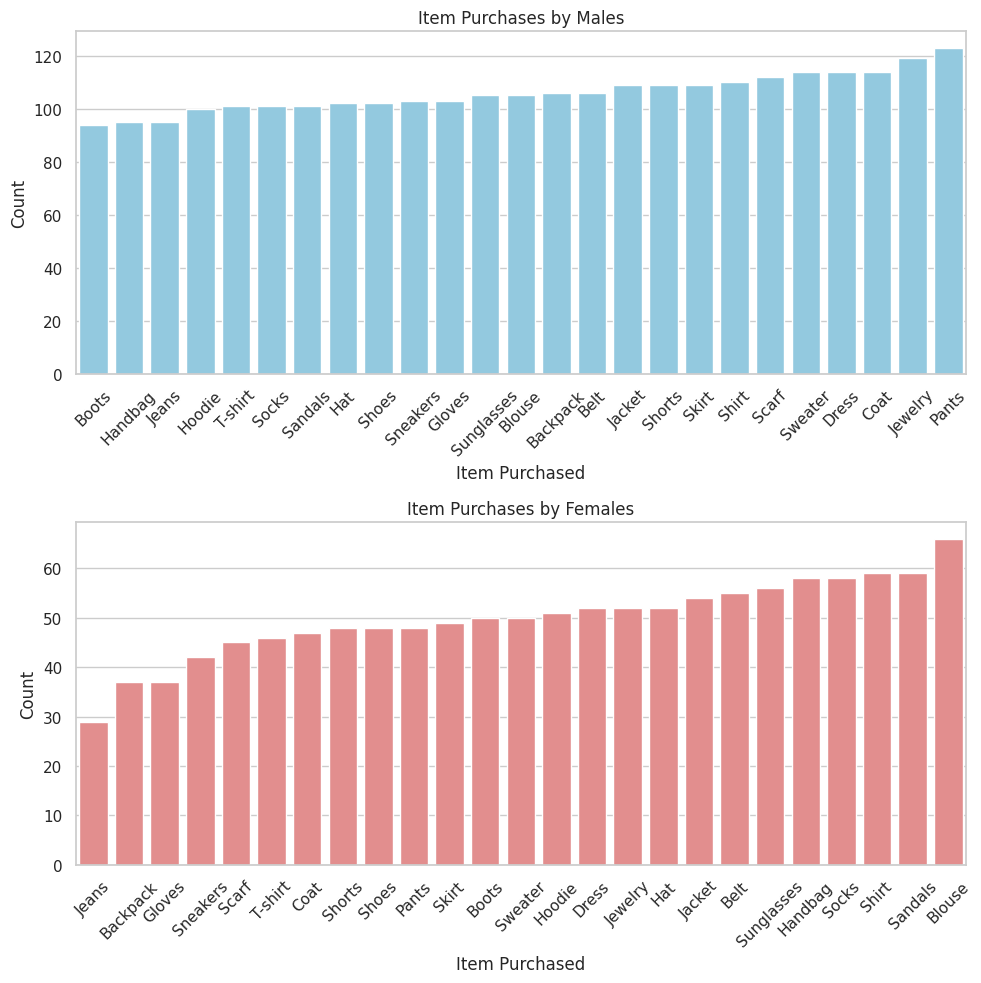

In [17]:
# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# Create separate plots for male and female
fig, axes = plt.subplots(nrows=2, figsize=(10, 10), sharex=False)

# Filter data for males and females
male_data = grouped_data[grouped_data['Gender'] == 'Male'].sort_values(by='Count')
female_data = grouped_data[grouped_data['Gender'] == 'Female'].sort_values(by='Count')

# Plot for males
sns.barplot(ax=axes[0], x='Item Purchased', y='Count', data=male_data, color='skyblue')
axes[0].set_title('Item Purchases by Males')
axes[0].set_xlabel('Item Purchased')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot for females
sns.barplot(ax=axes[1], x='Item Purchased', y='Count', data=female_data, color='lightcoral')
axes[1].set_title('Item Purchases by Females')
axes[1].set_xlabel('Item Purchased')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

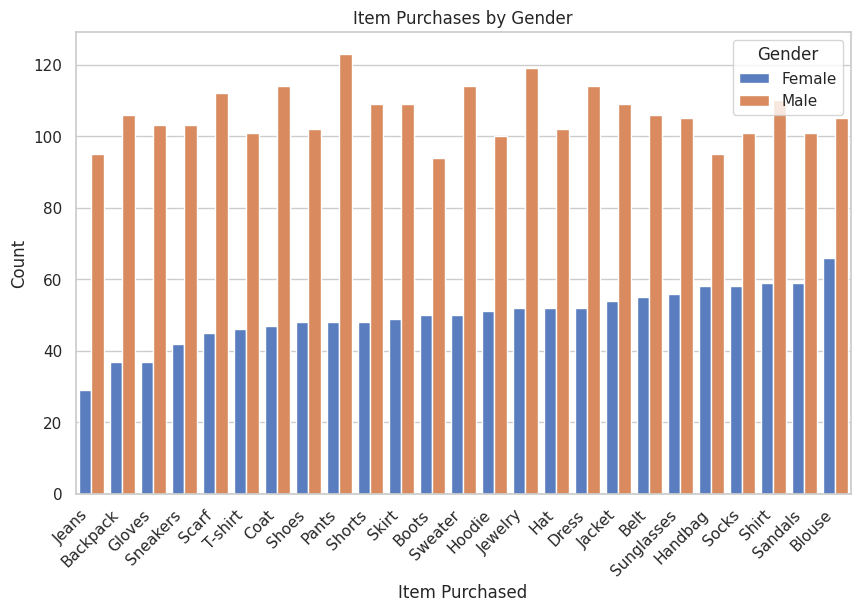

In [18]:
# Sort the DataFrame by count in ascending order
grouped_data = grouped_data.sort_values(by='Count')

# Create a bar chart with clusters for male and female
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Purchased', y='Count', hue='Gender', data=grouped_data)
plt.title('Item Purchases by Gender')
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', title_fontsize='12')
plt.show()